<a href="https://colab.research.google.com/github/Nagendrakoteru/dsml_sept/blob/main/Copy_of_Business_Case_Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!wget "https://drive.usercontent.google.com/download?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i&export=download" -O "Yulu.csv"

--2024-06-24 15:55:48--  https://drive.usercontent.google.com/download?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [application/octet-stream]
Saving to: ‘Yulu.csv’

Yulu.csv            100%[===================>] 633.16K  --.-KB/s    in 0.007s  

2024-06-24 15:55:49 (86.4 MB/s) - ‘Yulu.csv’ saved [648353/648353]



#1. Define the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis.
##a. Examine dataset structure, characteristics, and statistical summary.

In [3]:
yulu=pd.read_csv("Yulu.csv")

In [4]:
yulu.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
yulu.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
yulu['datetime']=pd.to_datetime(yulu['datetime'])

In [8]:
yulu.shape

(10886, 12)

In [9]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


Insights -
1.	Totally 10886 rows of data is available
2.	4 seasons are included
   *   Less number of Data on Season 1  because 25% of data is Season 2
   *   More number of data on Season 4
3.	Weather Most of the weather is in 1 and very less in Weather condition 3 and 4 because 75% of Weather is 2.
4.	 Temperature – Most of the temperature is in range of 20-30 with min 13.94 and max 41
5.	Feeling Temparature – We can see there is approximately 3~4  variation in Feels like
6.	WindSpeed  - Windspeed is in normal Condition only.
7.	Registered – Minimum Number of Registered Users are 0 and Maximum are 886 with Avg 155
8.	Yulu bike booked with Minimum 1 in a hour interval and maximum of 977 with Avg of 191


In [10]:
yulu['date']=yulu['datetime'].dt.date
yulu['Month']=yulu['datetime'].dt.month
yulu['Year']=yulu['datetime'].dt.year
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,Month,Year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,2011


##b. Identify missing values and perform Imputation using an appropriate method.

###Insight: We don't have any null or blank values in the dataset.

In [11]:
yulu.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
Month         0
Year          0
dtype: int64

In [12]:
#c. Identify and remove duplicate records.
#Insight: we don't have any duplicated columns in the dataset.
yulu.duplicated().sum()

0

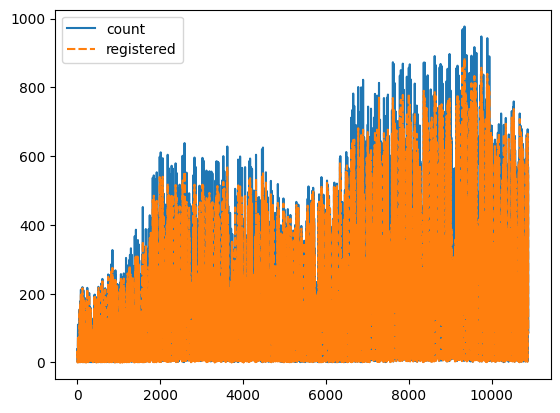

In [13]:

sns.lineplot(data=yulu[['date','count','registered']],estimator=np.sum)
plt.show()

Registring for bikes has been increased in working days for first 3 seasons and reduced in 4th Season.

For Holidays it is increased maintained constantly.

No. of Registered and Used users are slightly same. looks like there is difference of ~10%

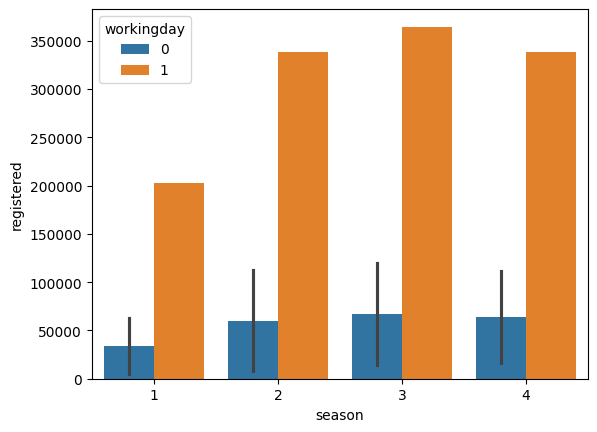

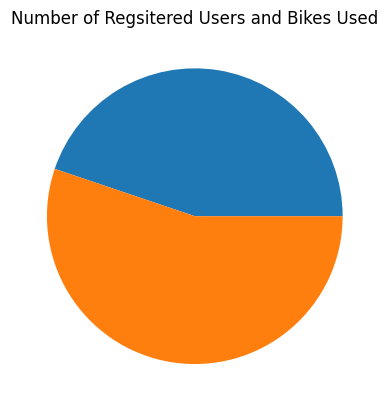

In [14]:
data=yulu[['season','holiday','workingday','registered','count']].groupby(by=['season','holiday','workingday']).sum(['registered','count']).reset_index()
sns.barplot(data=data,x='season',y='registered',hue='workingday')
plt.show()
plt.pie(data[['registered','count']].sum())
plt.title("Number of Regsitered Users and Bikes Used")
plt.show()



In [15]:
seasons=yulu[['season','registered','count','temp']].groupby(by=['temp','season']).sum(['count','registered']).reset_index()
seasons.head()

,temp,season,registered,count
0,0.82,1,538,544
1,1.64,1,176,183
2,2.46,1,204,215
3,3.28,1,203,212
4,4.10,1,2160,2212


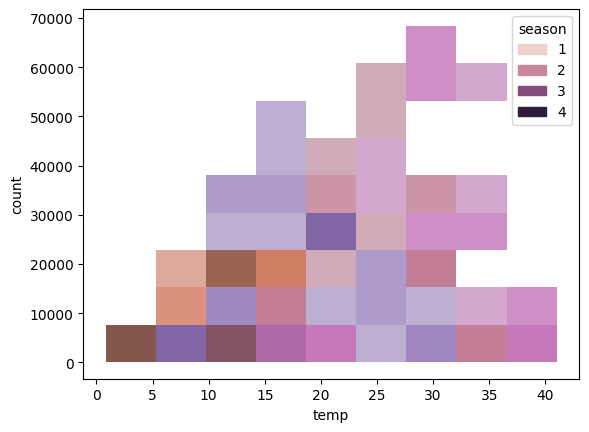

In [16]:
sns.histplot(data=seasons,x='temp',y='count',hue='season')
plt.show()

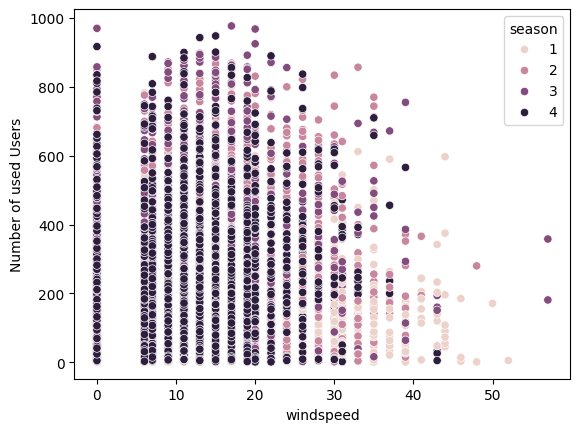

In [17]:
sns.scatterplot(data=yulu,x='windspeed',y='count',hue='season')
plt.ylabel("Number of used Users")
plt.show()

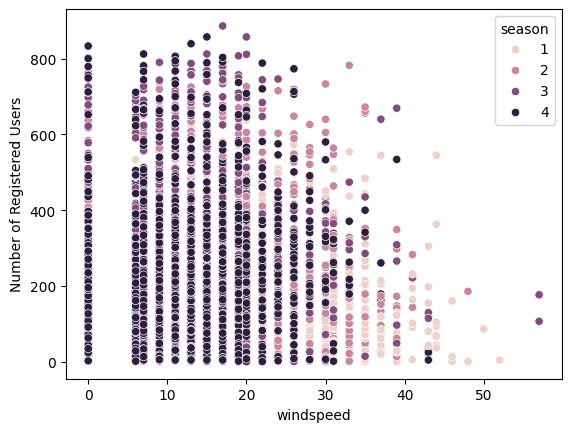

In [18]:
sns.scatterplot(data=yulu,x='windspeed',y='registered',hue='season')
plt.ylabel("Number of Registered Users")
plt.show()

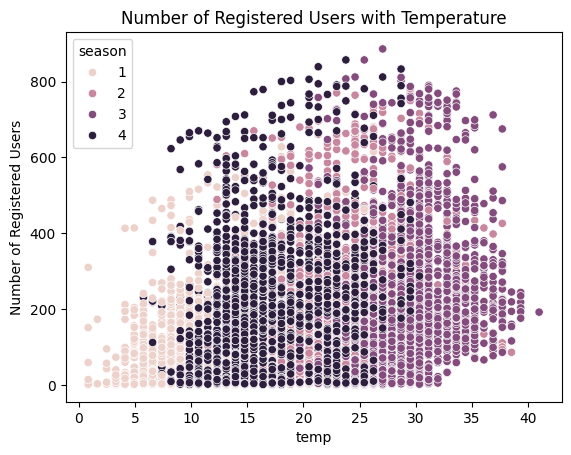

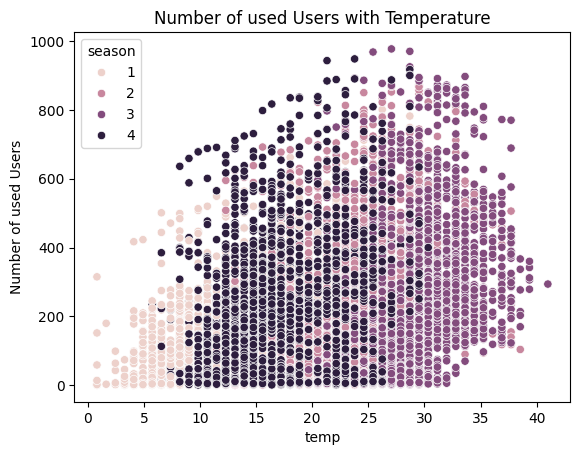

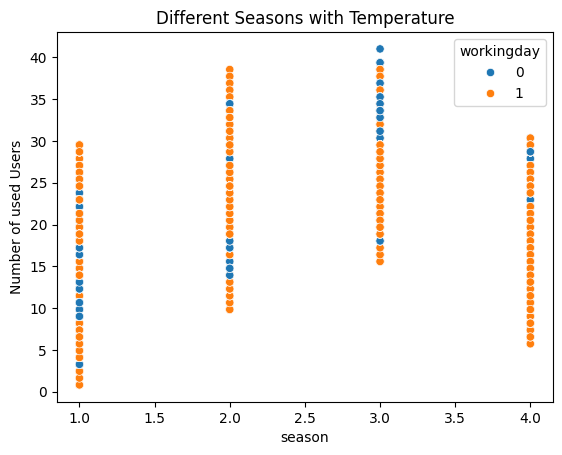

In [19]:
sns.scatterplot(data=yulu,x='temp',y='registered',hue='season')
plt.ylabel("Number of Registered Users")
plt.title("Number of Registered Users with Temperature")
plt.show()

sns.scatterplot(data=yulu,x='temp',y='count',hue='season')
plt.ylabel("Number of used Users")
plt.title("Number of used Users with Temperature")
plt.show()

sns.scatterplot(data=yulu,y='temp',x='season',hue='workingday')
plt.ylabel("Number of used Users")
plt.title("Different Seasons with Temperature")
plt.show()

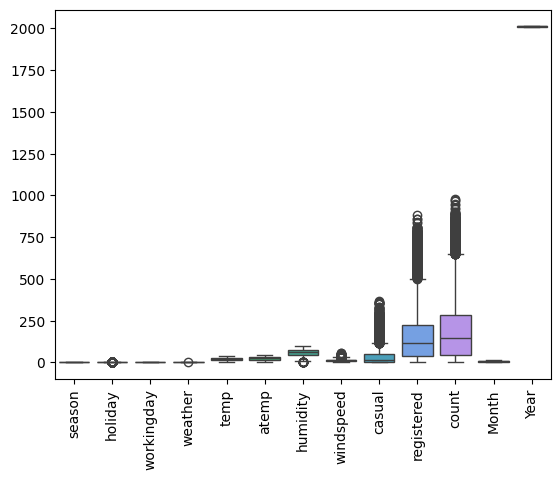

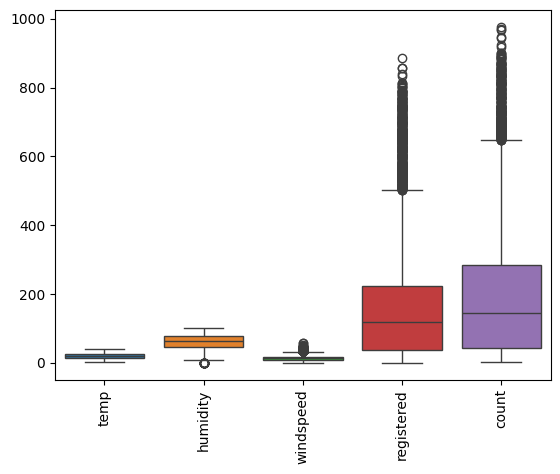

In [20]:
#Insight: There are many outliers in registered and count users followed by casual, windspeed and humidity.

sns.boxplot(data=yulu)
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=yulu[['temp','humidity','windspeed','registered','count']])
plt.xticks(rotation=90)
plt.show()


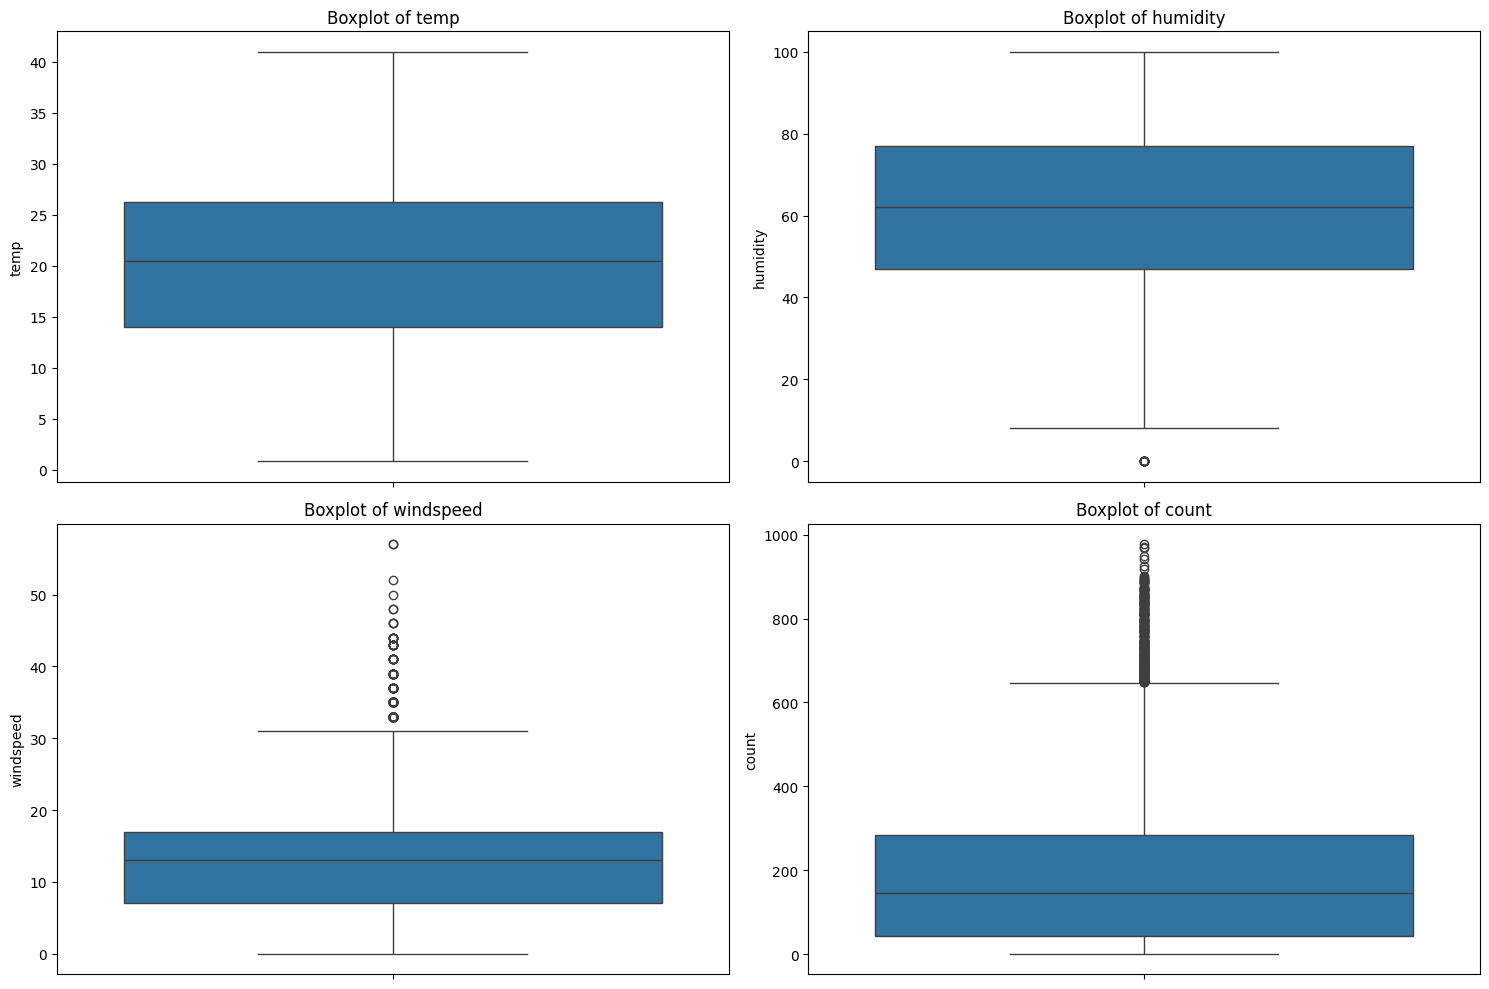

In [21]:
numericColumns = ['temp', 'humidity', 'windspeed', 'count']
plt.figure(figsize=(15, 10))

for i, column in enumerate(numericColumns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=yulu[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [22]:
"""def handleOutliers(df,columnName):
  q1=df[columnName].quantile(0.25)
  q3=df[columnName].quantile(0.75)
  iqr=q3-q1

  lowerBound=q1-1.5*iqr
  upperBound=q3+1.5*iqr
  df[columnName]=np.where(df[columnName]<lowerBound,lowerBound,df[columnName])
  df[columnName]=np.where(df[columnName]>upperBound,upperBound,df[columnName])

  return df"""


'def handleOutliers(df,columnName):\n  q1=df[columnName].quantile(0.25)\n  q3=df[columnName].quantile(0.75)\n  iqr=q3-q1\n\n  lowerBound=q1-1.5*iqr\n  upperBound=q3+1.5*iqr\n  df[columnName]=np.where(df[columnName]<lowerBound,lowerBound,df[columnName])\n  df[columnName]=np.where(df[columnName]>upperBound,upperBound,df[columnName])\n\n  return df'

In [23]:
"""
data=yulu.copy()

for columnName in numericColumns:
  data=handleOutliers(data,columnName)
  """

'\ndata=yulu.copy()\n\nfor columnName in numericColumns:\n  data=handleOutliers(data,columnName)\n  '

#2. Try establishing a Relationship between the Dependent and Independent Variables.
###Hint:
####i. Plot a Correlation Heatmap and draw insights.
####ii. Remove the highly correlated variables, if any.

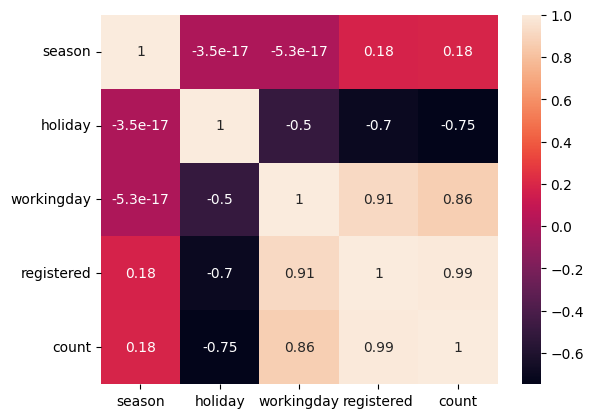

In [24]:
#data=data.drop(columns=['datetime','date','Year','Month'])
sns.heatmap(data=data.corr(),annot=True)
correlatedData=data.corr()

#Insight: There is a strong correlation between Casual*Count and Casual&Registered negative relation Ship between season and
# windspeed, humidity with windspeed, casual, Registed and count

#3. Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?
a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
b. Select an appropriate test -
i. Hint: 2- Sample Independent T-test
c. Set a significance level
i. Hint: alpha=5% is recommended
d. Calculate test Statistics / p-value
e. Decide whether to accept or reject the Null Hypothesis.
Hint:
i. If the p-value is less than or equal to the predetermined level of
significance (alpha), we have evidence to reject the null hypothesis.
ii. If the p-value is greater than the predetermined level of significance
(alpha), we do not have sufficient evidence to reject the null hypothesis.
f. Draw inferences & conclusions from the analysis and provide recommendations.

In [25]:
#Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1) :
#H0= No significance difference between No. of rides between Weekdays and weekends
#H1= There is a significance difference between No. of rides between weekdays and Weekends.
#lets choose 2 sample test.
#Significance Level 0.5
yulu['day of Week']=yulu['datetime'].dt.day_of_week
alpha=0.5

import scipy.stats as stat

weekdays=yulu[yulu['day of Week']<5]
weekends=yulu[yulu['day of Week']>=5]

t_test,p_value=stat.ttest_ind(weekdays['count'],weekends['count'],equal_var=False)
print(f"T Test :{t_test}, P_Value: {p_value}")

if p_value<=alpha:
  print("Reject Null Hypothesis")
  print("There is a no significance difference in rides between weekdays and weekends")
else:
  print("Null Hypothesis is correct")
  print("There is significance difference on rides between weekdays and weekends")


#Insight: Making bikes available during Weekend.
#provide some discounts to encourage users during weekdays.



T Test :1.0589713677293344, P_Value: 0.2896542265218858
Reject Null Hypothesis
There is a no significance difference in rides between weekdays and weekends


#4. Check if the demand of bicycles on rent is the same for different Weather conditions?
##a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
##b. Select an appropriate test -
###i. Hint: One-way ANOVA test
##c. Check assumptions of the test
###i. Normality
###Hint:
##1. Use Histogram, Q-Q Plot, Skewness & Kurtosis
##2. Shapiro-Wilk’s test
###ii. Equality Variance
###Hint:
####1. Levene’s test
##iii. Please continue doing the analysis even if some assumptions fail(Levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary.

##d. Set a significance level and Calculate the test Statistics / p-value.
###i. Hint: alpha=5% is recommended
####e. Decide whether to accept or reject the Null Hypothesis.
#####Hint:
#####i. If the p-value is less than or equal to the predetermined level of significance (alpha), we have evidence to reject the null hypothesis.
###ii. If the p-value is greater than the predetermined level of significance (alpha), we do not have sufficient evidence to reject the null hypothesis.
####f. Draw inferences & conclusions from the analysis and provide recommendations.

In [26]:
#One way anova
alpha=0.05
stats,pvalue=stat.f_oneway(yulu[yulu['weather']==1]['count'],yulu[yulu['weather']==2]['count'],yulu[yulu['weather']==3]['count'],yulu[yulu['weather']==4]['count'])
print(f"Stats: {stats}, pvalue:{pvalue}")

if pvalue<alpha:
  print("reject Null hypothesis")
  print("There is a significane difference between the weather and bikes usage")
else:
  print("Fail to reject Null hypothesis")
  print("There is no significane difference between the weather and bikes usage")



Stats: 65.53024112793271, pvalue:5.482069475935669e-42
reject Null hypothesis
There is a significane difference between the weather and bikes usage


In [27]:
#Insights: Using oneway we observed that there is significane difference between the Number of bikes usage and different weather.
#Using ttest lets find which gorups are having a differences

weather=[1,2,3,4]
for i in range(len(weather)):
  if i<len(weather):
    for j in range(i+1,len(weather)):
      stats,pvalue=stat.ttest_ind(yulu[yulu['weather']==weather[i]]['count'],yulu[yulu['weather']==weather[j]]['count'])
      print(f"Stats: {stats}, pvalue: {pvalue}")
      if pvalue<alpha:
        print("Reject Null hypothesis")
        print(f"There is no significane difference between {weather[i]} and {weather[j]}")
      else:
        print("Fail to reject Null hypothesis")
        print(f"There is significane difference between {weather[i]} and {weather[j]}")
      print("-"*70)


#Here we can observe there is a difference in data for Weather condition 4 when comparing with other groups

Stats: 6.488169251217751, pvalue: 9.098916216508542e-11
Reject Null hypothesis
There is no significane difference between 1 and 2
----------------------------------------------------------------------
Stats: 13.05352692528198, pvalue: 1.4918709771846276e-38
Reject Null hypothesis
There is no significane difference between 1 and 3
----------------------------------------------------------------------
Stats: 0.2193765669760516, pvalue: 0.8263629486856604
Fail to reject Null hypothesis
There is significane difference between 1 and 4
----------------------------------------------------------------------
Stats: 9.53048112515673, pvalue: 2.7459673190273642e-21
Reject Null hypothesis
There is no significane difference between 2 and 3
----------------------------------------------------------------------
Stats: 0.08881166808329576, pvalue: 0.9292378620015864
Fail to reject Null hypothesis
There is significane difference between 2 and 4
----------------------------------------------------------

In [28]:
#Lets Apply Kruskal Walis Test
#H0: There is no significance differnece between the weather conditions in using bike
#H1: There is a significance difference between the weather conditions and Bikes usage


kstat,pvalue=stat.kruskal(yulu[yulu['weather']==1]['count'],yulu[yulu['weather']==2]['count'],yulu[yulu['weather']==3]['count'],yulu[yulu['weather']==4]['count'])

print(f"PValue: {pvalue}, Kstat: {kstat}")

if pvalue<alpha:
  print("Reject Null Hypothesis")
  print("There is a siginificance difference between the usage of Bikes based on the weather")
else:
  print("Fail to Reject Null hyptohesis")
  print("There is no significane difference between the usage of Bikes based on the waether")


PValue: 3.501611300708679e-44, Kstat: 205.00216514479087
Reject Null Hypothesis
There is a siginificance difference between the usage of Bikes based on the weather


<Axes: xlabel='count', ylabel='Count'>

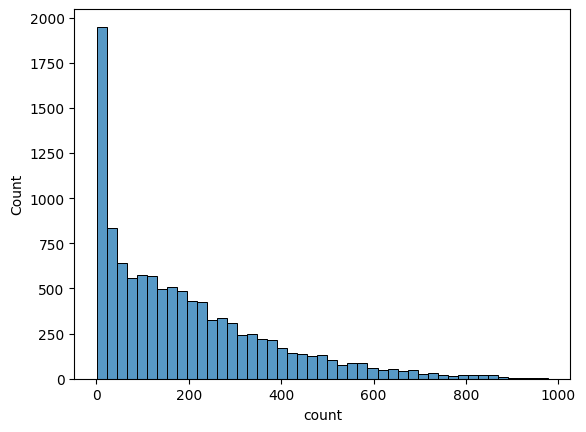

In [29]:
#lets check whether data is Gausian or not
sns.histplot(data=yulu['count'])
#Insight: Data is right skewed looks like not Gausian lets check QQ Plots


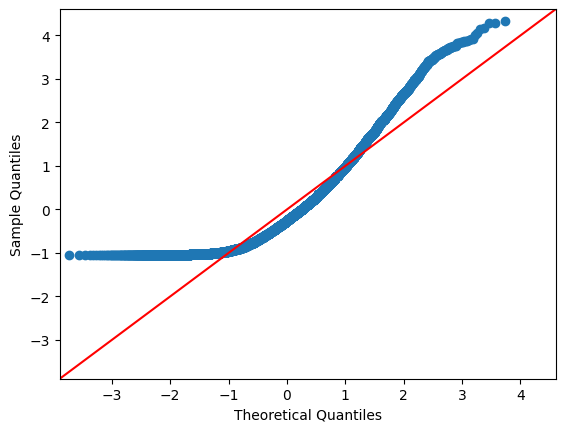

In [30]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

sm.qqplot(yulu['count'], line ='45', fit=True)
#plt.title(f'Weather {condition} - Q-Q Plot')

plt.show()


#Insght: some parts of data is above the line and some of are below the line. Data is not normally distributed



In [31]:
#Lets Perform Shapiro Test whether data is Normal Distribution or not
np.random.sample(42)
sample=yulu['count'].sample(100)

sstat,pvalue=stat.shapiro(sample)

if pvalue<alpha:
  print("Reject Null Hypothesis")
  print("Data is not Gausian")
else:
  print("Fail to reject Null hypothesis")
  print("Data is gausian")

Reject Null Hypothesis
Data is not Gausian


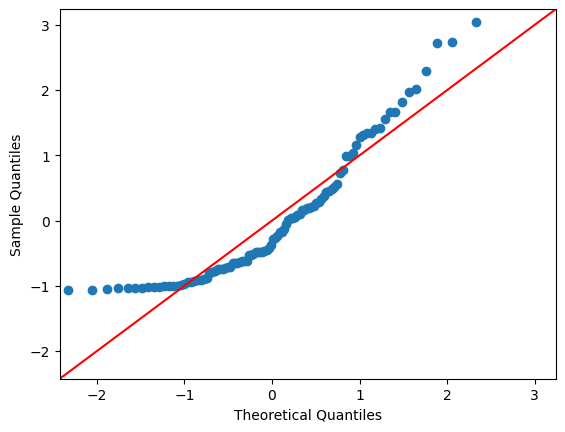

In [32]:
#lets check QQ plot sample data

sm.qqplot(sample,line='45',fit=True)
plt.show()

#5.Check if the demand of bicycles on rent is the same for different Seasons?
a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
b. Select an appropriate test -
i. Hint: One-way ANOVA test
c. Check assumptions of the test
i. Normality

In [33]:
yulu['season'].unique()

array([1, 2, 3, 4])

In [34]:
#Null Hypothesis: Demand for Bicycles is same on all Different Seasons
#Alternate Hypothesis: Demand for Bicycles in not same on all different Seasons

season=yulu['season'].unique()
s1=yulu[yulu['season']==1]['count']
s2=yulu[yulu['season']==2]['count']
s3=yulu[yulu['season']==3]['count']
s4=yulu[yulu['season']==4]['count']


fstat,pvalue=stat.f_oneway(s1,s2,s3,s4)

print(f"Fstat: {fstat}, pvalue:{pvalue}")
alpha=0.05

if pvalue<alpha:
  print("Reject Null hypothesis")
  print("At least one season is having a differece in demand for bikes in different Seasons")

else:
  print("Fail to Reject Null Hypothesis")
  print("There is no significane difference in demand for bikes in differene Seasons")

Fstat: 236.94671081032106, pvalue:6.164843386499654e-149
Reject Null hypothesis
At least one season is having a differece in demand for bikes in different Seasons


In [35]:
#lets find which season is having significance difference for Bikes when comparing with other seasons


tstats,pvalue=stat.ttest_ind(s1,s2)
print(f"Tstats {tstats} and pvalue: {pvalue}")
if pvalue<alpha:
  print("Reject Null hypothesis")
  print(f"there is no significane difference between the Demand for bikes between s1 and s2")
else:
  print("Fail to  Null hypothesis")
  print(f"There is a significance difference between the demand for bikes between s1 and s2")


print("-"*70)

tstats,pvalue=stat.ttest_ind(s1,s3)
print(f"Tstats {tstats} and pvalue: {pvalue}")
if pvalue<alpha:
  print("Reject Null hypothesis")
  print(f"there is no significane difference between the Demand for bikes between s1 and s3")
else:
  print("Fail to  Null hypothesis")
  print(f"There is a significance difference between the demand for bikes between s1 and s3")

print("-"*70)


tstats,pvalue=stat.ttest_ind(s1,s4)
print(f"Tstats {tstats} and pvalue: {pvalue}")
if pvalue<alpha:
  print("Reject Null hypothesis")
  print(f"there is no significane difference between the Demand for bikes between s1 and s4")
else:
  print("Fail to  Null hypothesis")
  print(f"There is a significance difference between the demand for bikes between s1 and s4")

print("-"*70)

tstats,pvalue=stat.ttest_ind(s2,s3)
print(f"Tstats {tstats} and pvalue: {pvalue}")
if pvalue<alpha:
  print("Reject Null hypothesis")
  print(f"there is no significane difference between the Demand for bikes between s2 and s3")
else:
  print("Fail to  Null hypothesis")
  print(f"There is a significance difference between the demand for bikes between s2 and s3")

print("-"*70)

tstats,pvalue=stat.ttest_ind(s2,s4)
print(f"Tstats {tstats} and pvalue: {pvalue}")
if pvalue<alpha:
  print("Reject Null hypothesis")
  print(f"there is no significane difference between the Demand for bikes between s2 and s4")
else:
  print("Fail to  Null hypothesis")
  print(f"There is a significance difference between the demand for bikes between s2 and s4")

print("-"*70)

tstats,pvalue=stat.ttest_ind(s3,s4)
print(f"Tstats {tstats} and pvalue: {pvalue}")
if pvalue<alpha:
  print("Reject Null hypothesis")
  print(f"there is no significane difference between the Demand for bikes between s3 and s4")
else:
  print("Fail to  Null hypothesis")
  print(f"There is a significance difference between the demand for bikes between s3 and s4")


Tstats -22.41673852194779 and pvalue: 1.6578587340400095e-106
Reject Null hypothesis
there is no significane difference between the Demand for bikes between s1 and s2
----------------------------------------------------------------------
Tstats -26.262602569974415 and pvalue: 3.403850435531097e-143
Reject Null hypothesis
there is no significane difference between the Demand for bikes between s1 and s3
----------------------------------------------------------------------
Tstats -19.763761227758852 and pvalue: 5.236417429066782e-84
Reject Null hypothesis
there is no significane difference between the Demand for bikes between s1 and s4
----------------------------------------------------------------------
Tstats -3.6407918229052068 and pvalue: 0.00027431561172498644
Reject Null hypothesis
there is no significane difference between the Demand for bikes between s2 and s3
----------------------------------------------------------------------
Tstats 3.2507544346007022 and pvalue: 0.001157968

In [36]:
#We had already verified and found that Data is gausian lets check levence Test

#Lets Apply Kruskal Walis Test
#H0: There is no significance differnece between the Seasons in using bike
#H1: There is a significance difference between the Seasons and Bikes usage


kstat,pvalue=stat.kruskal(s1,s2,s3,s4)

print(f"PValue: {pvalue}, Kstat: {kstat}")

if pvalue<alpha:
  print("Reject Null Hypothesis")
  print("There is a siginificance difference between the usage of Bikes based on the Season")
else:
  print("Fail to Reject Null hyptohesis")
  print("There is no significane difference between the usage of Bikes based on the Season")



PValue: 2.479008372608633e-151, Kstat: 699.6668548181988
Reject Null Hypothesis
There is a siginificance difference between the usage of Bikes based on the Season


In [37]:
stats,p_value=stat.levene(yulu[yulu['season']==1]['count'],yulu[yulu['season']==2]['count'],yulu[yulu['season']==3]['count'],yulu[yulu['season']==4]['count'])

#stat.levene(yulu[yulu['weather']==1]['count'],yulu[yulu['weather']==2]['count'],yulu[yulu['weather']==3]['count'],yulu[yulu['weather']==4]['count'])

print(stats,p_value)

187.7706624026276 1.0147116860043298e-118


In [38]:
annovaModel=ols('count ~ C(season)', data=yulu[['season','count']]).fit()
annovaTable=sm.stats.anova_lm(annovaModel,type=2)

aplph=0.5
if annovaTable['PR(>F)'][0]<=alpha:
  print("Reject the null hypothesis: there is significant difference in the number of bike rental in different Seasons")
else:
  print("Fail to reject null hypothesis: there is no significant difference in the number of bike rental in different Seasons")

#Insight: Provide some discounts to use bikes on different seasons.
#

Reject the null hypothesis: there is significant difference in the number of bike rental in different Seasons


#6.Check if the Weather conditions are significantly different during different Seasons?
a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
i. Hint: The values in ‘Weather’ &‘Season’ columns should be treated as
distinct Categories. Encode them accordingly.
b. Select an appropriate test -
i. Hint: Chi-square test
c. Create a Contingency Table against ‘Weather’ & ‘Season’ columns
i. Hint: You can use a Pandas’ CrossTab
d. Set a significance level and Calculate the test Statistics / p-value.
i. Hint: alpha=5% is recommended
e. Decide whether to accept or reject the Null Hypothesis.
Hint:
i. If the p-value is less than or equal to the predetermined level of
significance (alpha), we have evidence to reject the null hypothesis.
ii. If the p-value is greater than the predetermined level of significance
(alpha), we do not have sufficient evidence to reject the null hypothesis.
f. Draw inferences & conclusions from the analysis and provide recommendations.

In [39]:
#Null Hypothesis (H0): Weather conditions are independent of the seasons.i.e. Weather conditions are not significantly different across different seasons.

#Alternate Hypothesis (H1): Weather conditions are dependent on the seasons i.e. Weather conditions are significantly different across different seasons.

contigencyTable=pd.crosstab(yulu['season'],yulu['weather'])
contigencyTable

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [40]:

statistic,pvalue,dof,expected_Freq=stat.chi2_contingency(contigencyTable)
alpha=0.5
if pvalue<alpha:
  print("Reject Null hypothesis - Weather conditions are significantly different in each season")
else:
  print("Don't reject Null hypothesis - Weather conditions are not significantly different in each season")

#Insight: Weather conditions are significantly different in each season so we need to plan various maintainance activities during harsh conditions.
#provide discounts during non-harsh conditions to improve usage of cycles and also run promotions to attract customers.

Reject Null hypothesis - Weather conditions are significantly different in each season


In [41]:
#
#
#
#
#
